In [68]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
from pandas import DataFrame
%matplotlib inline

In [2]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [4]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SECRET = os.getenv('PLAID_SECRET')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')
PLAID_CLIENT_ID

'5e8dd6a67a7fbc0014201185'

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to plaid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [5]:
# Select an Institution for processing
INSTITUTION_ID = "ins_109508"

In [29]:
# Create client object
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment='sandbox')

#Testing client: the output should be some other institution_id 
client.Institutions.get(1)

{'institutions': [{'country_codes': ['US'],
   'credentials': [{'label': 'Username', 'name': 'username', 'type': 'text'},
    {'label': 'Password', 'name': 'password', 'type': 'password'}],
   'has_mfa': True,
   'input_spec': 'fixed',
   'institution_id': 'ins_112060',
   'mfa': ['code', 'list', 'questions', 'selections'],
   'mfa_code_type': 'numeric',
   'name': '1st Bank (Broadus, MT) - Personal',
   'oauth': False,
   'products': ['assets',
    'auth',
    'balance',
    'transactions',
    'income',
    'identity'],
   'routing_numbers': []}],
 'request_id': 'pDgOWOm8vY4DSqq',
 'total': 11419}

### 2. Generate a public token

In [7]:
# Create public token to be exchanged for institution access token
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])
print(create_tkn_response)

{'public_token': 'public-sandbox-560f4ebb-6024-4743-b5d1-6ac1c80a86b8', 'request_id': '8RAWh1wQ8OlOJoF'}


### 3. Exchange the public token for an access token

In [8]:
# Exchange public token for access token
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])

# Store access token as variable
access_token = exchange_response['access_token']
access_token

access-sandbox-feb2c683-2f5e-46bd-b58d-cb328ea4be72


### 4. Fetch Accounts

In [16]:
# Get accounts associated with institution
accounts = client.Accounts.get(access_token)
pretty_print_response(accounts)

{
    "accounts": [
        {
            "account_id": "nyXR5ozD4Zi1MKq4xKQzsj7JzaRdQbi6qmRMR",
            "balances": {
                "available": 100,
                "current": 110,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "0000",
            "name": "Plaid Checking",
            "official_name": "Plaid Gold Standard 0% Interest Checking",
            "subtype": "checking",
            "type": "depository"
        },
        {
            "account_id": "bLaDx4JXpBHoL4gAa4rBTZ93mqj1M7tVpvj6e",
            "balances": {
                "available": 200,
                "current": 210,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "1111",
            "name": "Plaid Saving",
            "official_name": "Plaid Silver Standard 0.1% Interest Saving",
       

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [46]:
# Get transactions for institution for specific date range
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

# Get transactions for date range
last_90=client.Transactions.get(access_token,start_date,end_date)

# Print JSON output
    #print(json.dumps(last_90['transactions'],indent=4, sort_keys=True))
    
pretty_print_response(last_90['transactions'])

[
    {
        "account_id": "bLaDx4JXpBHoL4gAa4rBTZ93mqj1M7tVpvj6e",
        "account_owner": null,
        "amount": 25,
        "authorized_date": null,
        "category": [
            "Payment",
            "Credit Card"
        ],
        "category_id": "16001000",
        "date": "2020-04-15",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "name": "CREDIT CARD 3333 PAYMENT *//",
        "payment_channel": "other",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
        },
        "pending": fals

### 2. Print the categories for each transaction

In [59]:
# Iterate and parse JSON response
for transaction in last_90['transactions']:
        pretty_print_response(transaction['category'])

[
    "Payment",
    "Credit Card"
]
[
    "Travel",
    "Taxi"
]
[
    "Transfer",
    "Debit"
]
[
    "Transfer",
    "Deposit"
]
[
    "Recreation",
    "Gyms and Fitness Centers"
]
[
    "Travel",
    "Airlines and Aviation Services"
]
[
    "Food and Drink",
    "Restaurants",
    "Fast Food"
]
[
    "Food and Drink",
    "Restaurants",
    "Coffee Shop"
]
[
    "Food and Drink",
    "Restaurants"
]
[
    "Transfer",
    "Credit"
]
[
    "Travel",
    "Airlines and Aviation Services"
]
[
    "Travel",
    "Taxi"
]
[
    "Food and Drink",
    "Restaurants"
]
[
    "Payment"
]
[
    "Food and Drink",
    "Restaurants",
    "Fast Food"
]
[
    "Shops",
    "Sporting Goods"
]
[
    "Payment",
    "Credit Card"
]
[
    "Travel",
    "Taxi"
]
[
    "Transfer",
    "Debit"
]
[
    "Transfer",
    "Deposit"
]
[
    "Recreation",
    "Gyms and Fitness Centers"
]
[
    "Travel",
    "Airlines and Aviation Services"
]
[
    "Food and Drink",
    "Restaurants",
    "Fast Food"
]
[
    "Food a

### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [209]:
# Create empty list
dates=[]
name=[]
category=[]
amount=[]

# Iterate over transactions and get info to make columns 
for transaction in last_90['transactions']:
    dates.append(transaction["date"])
    name.append(transaction['name'])
    category.append(transaction['category'][0])
    amount.append(transaction['amount'])
    
# Convert list into columns with column names
date_df = DataFrame(dates,columns=['Date'])
name_df = DataFrame(name,columns=['Description'])
category_df = DataFrame(category,columns=['Category'])
amount_df = DataFrame(amount,columns=['Amount'])

# Concat the columns
df = pd.concat([date_df, name_df, category_df, amount_df], axis='columns', join='inner')
df.head()

,Date,Description,Category,Amount
0,2020-04-15,CREDIT CARD 3333 PAYMENT *//,Payment,25.0
1,2020-04-15,Uber,Travel,5.4
2,2020-04-14,ACH Electronic CreditGUSTO PAY 123456,Transfer,5850.0
3,2020-04-14,CD DEPOSIT .INITIAL.,Transfer,1000.0
4,2020-04-13,Touchstone Climbing,Recreation,78.5


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [210]:
# Checking column types
df.dtypes

Date            object
Description     object
Category        object
Amount         float64
dtype: object

In [211]:
# datetimeindex for the date and float for the amount
df['Amount']=df['Amount'].astype('float')
df['Date'] = pd.to_datetime(df['Date']) 
df.dtypes

Date           datetime64[ns]
Description            object
Category               object
Amount                float64
dtype: object

In [212]:
df.set_index('Date', inplace=True)
df.head()

,Description,Category,Amount
Date,,,
2020-04-15,CREDIT CARD 3333 PAYMENT *//,Payment,25.0
2020-04-15,Uber,Travel,5.4
2020-04-14,ACH Electronic CreditGUSTO PAY 123456,Transfer,5850.0
2020-04-14,CD DEPOSIT .INITIAL.,Transfer,1000.0
2020-04-13,Touchstone Climbing,Recreation,78.5


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [121]:
# Fetch income from previous
client_income = client.Income.get(access_token)
client_income

{'income': {'income_streams': [{'confidence': 0.99,
    'days': 720,
    'monthly_income': 500,
    'name': 'UNITED AIRLINES'}],
  'last_year_income': 6500,
  'last_year_income_before_tax': 7893,
  'max_number_of_overlapping_income_streams': 1,
  'number_of_income_streams': 1,
  'projected_yearly_income': 6085,
  'projected_yearly_income_before_tax': 7389},
 'request_id': 'c3cOQxmw3JC3q4L'}

In [123]:
# Sort
gross_income = client_income['income']['last_year_income_before_tax']
current_monthly_income = client_income['income']['income_streams'][0]['monthly_income']
projected_yearly_income = client_income['income']['projected_yearly_income']

# Print results
print(f"Previous Year's Gross Income: ${gross_income}.\n"
      f"Current Monthly Income: ${current_monthly_income}.\n"
      f"Projected Yearly Income: ${projected_yearly_income}."
)

Previous Year's Gross Income: $7893.
Current Monthly Income: $500.
Projected Yearly Income: $6085.


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calculate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

In [148]:
# grouping and summing per category
spending_per_category = df.groupby('Category').sum()
spending_per_category

,Amount
Category,
Food and Drink,3317.19
Payment,6310.50
Recreation,235.50
Shops,1500.00
Transfer,20537.34
Travel,35.19


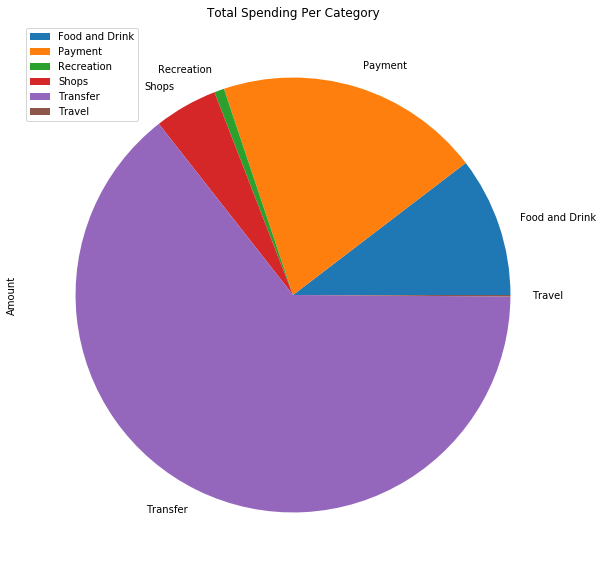

In [144]:
# Pie chart of spending per category (according to the README file)
pie_chart =grouped_categories.plot(kind='pie', y= 'Amount', figsize=(20, 10), title='Total Spending Per Category')

### Calculate the expenses per month

In [223]:
# Bar graph of number of transactions for each category
grouped_by_month = df.groupby([df.index.month])[["Amount"]].sum()
grouped_by_month

,Amount
Date,
1,4084.83
2,10145.24
3,11145.24
4,6560.41


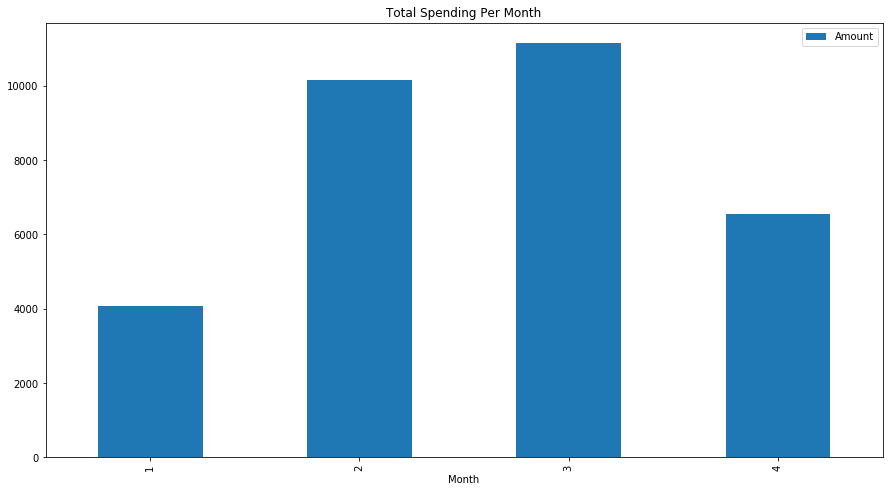

In [235]:
#set index to Month and Plot Bar Graph
grouped_by_month = grouped_by_month.rename_axis("Month", axis="index")
Bar_graph =grouped_by_month.plot(kind='bar', y= 'Amount', figsize=(15, 8), title='Total Spending Per Month')